In [2]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:
X = np.array([[0, 0, 0], [1, 0, 0], [1, 0, 1], [0, 1, 0], [0, 1, 1]])


In [10]:
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)

[[-0.35841979  0.49203711]
 [-0.19120627 -0.68359023]
 [-0.83695555 -0.52527462]
 [ 0.43801955  0.72545553]
 [ 0.94856206 -0.00862779]]


In [11]:
dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

In [12]:
X_transform_L1


array([[-0.33496253,  0.63985731],
       [-1.17907199, -0.13941344],
       [-0.68791906, -1.25854459],
       [ 0.77748803,  0.90732773],
       [ 1.42446555, -0.14922701]])

Text(0.5, 0.92, 'Original Points')

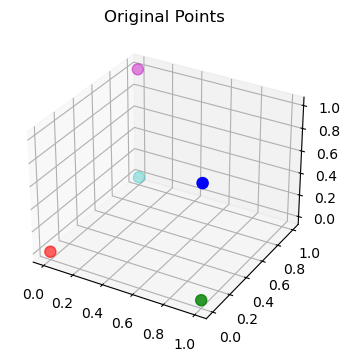

In [13]:
colors = ['r', 'g', 'b', 'c', 'm']
size = [64, 64, 64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')


Text(0.5, 1.0, 'Embedding in 2D')

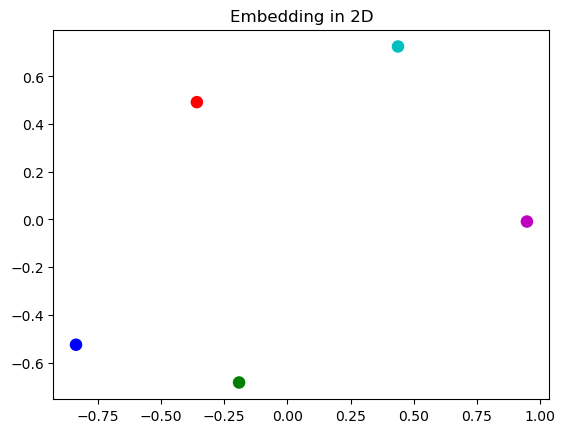

In [14]:
 ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')

In [17]:
def mapData(dist_matrix, X, y, metric, title):
     mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
     # Get the embeddings
     pts = mds.fit_transform(dist_matrix)
     # Plot the embedding, colored according to the class of the points
     fig = plt.figure(2, (15,6))


     ax = fig.add_subplot(1,2,1)
     ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
     hue=y, palette=['r', 'g', 'b', 'c'])
     # Add the second plot
     ax = fig.add_subplot(1,2,2)
     # Plot the points again
     plt.scatter(pts[:, 0], pts[:, 1])

     # Annotate each point by its corresponding face image
     for x, ind in zip(X, range(pts.shape[0])):
         im = x.reshape(64,64)
         imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
         i = pts[ind, 0]
         j = pts[ind, 1]
         ab = AnnotationBbox(imagebox, (i, j), frameon=False)
         ax.add_artist(ab)
         plt.title(title)
         plt.show()


In [18]:
import sklearn.datasets as dt
faces = dt.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\vhars\scikit_learn_data


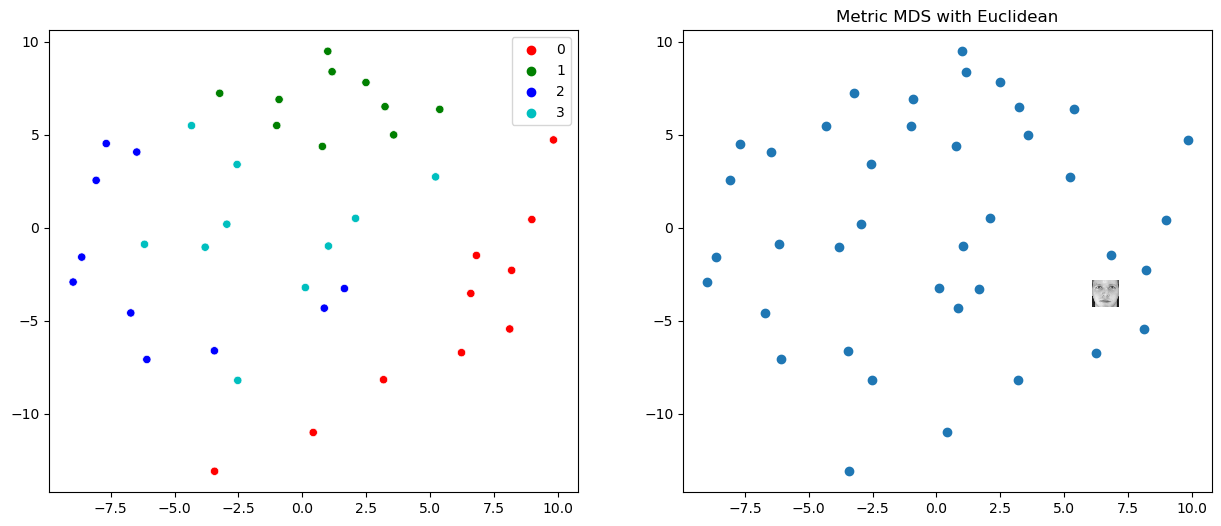

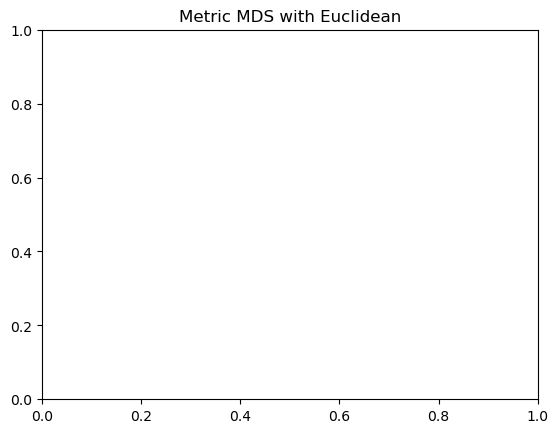

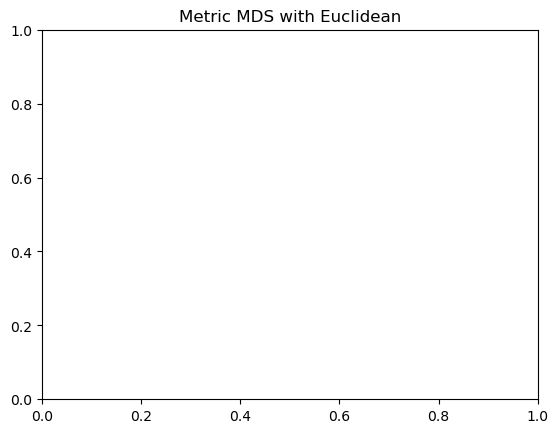

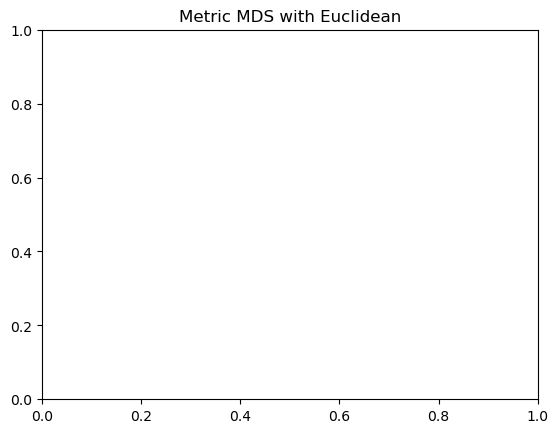

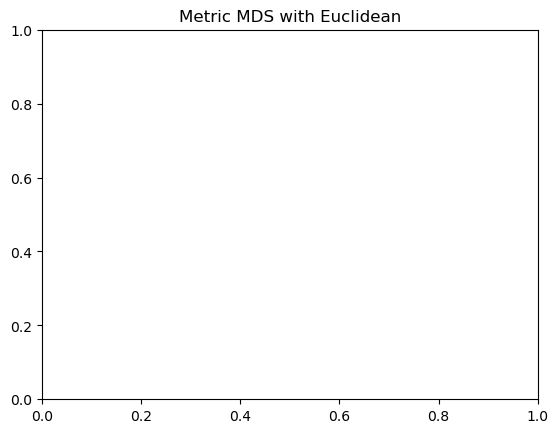

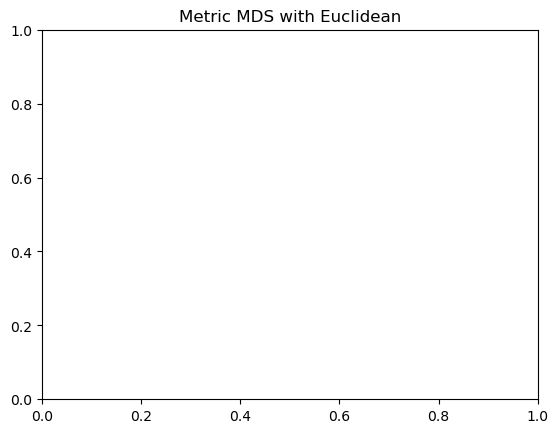

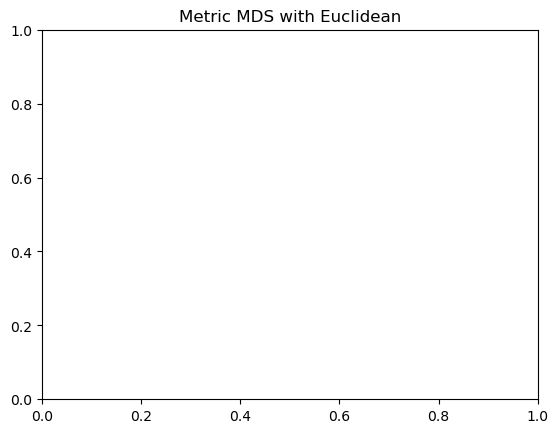

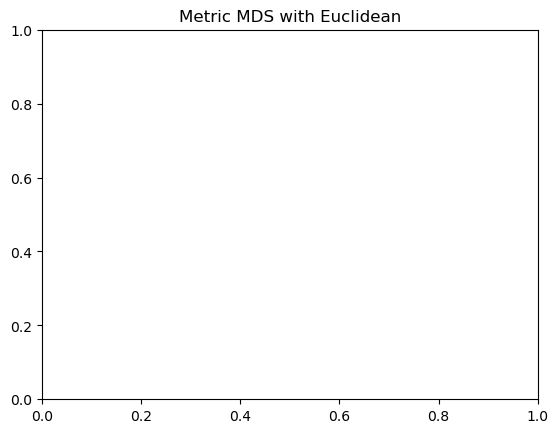

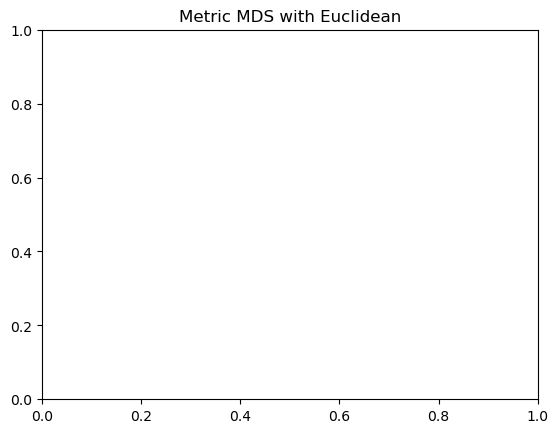

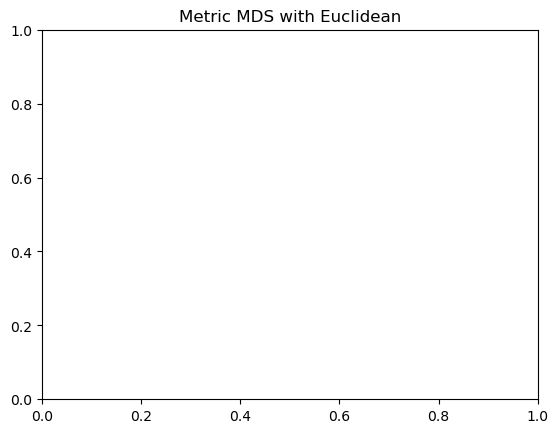

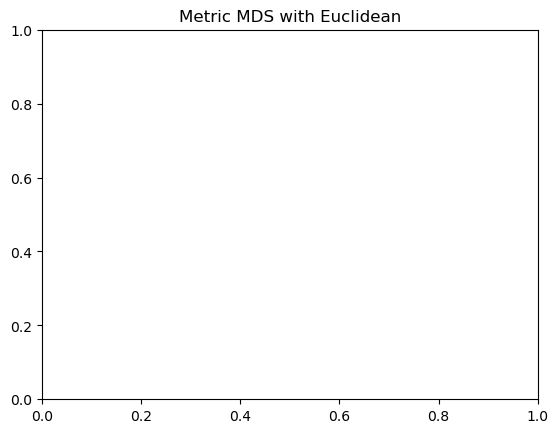

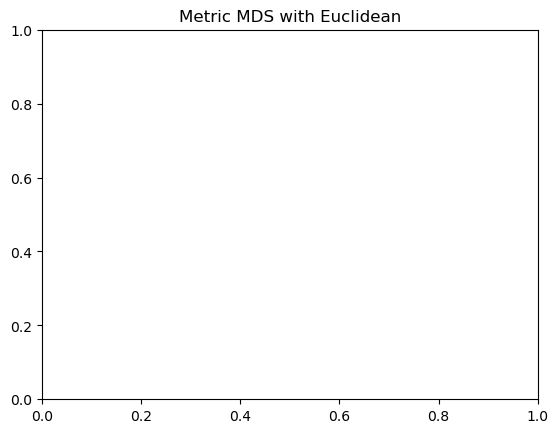

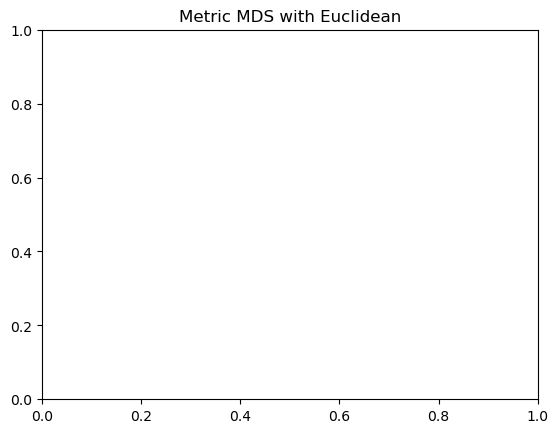

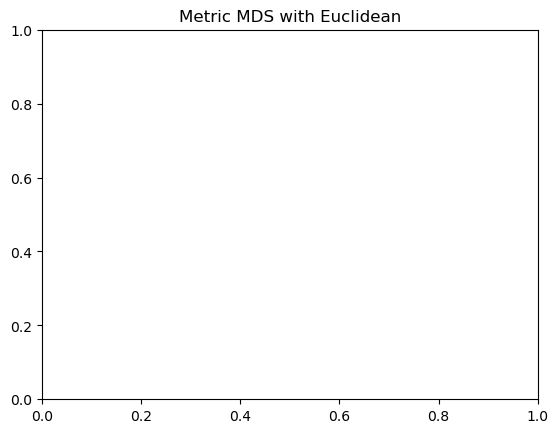

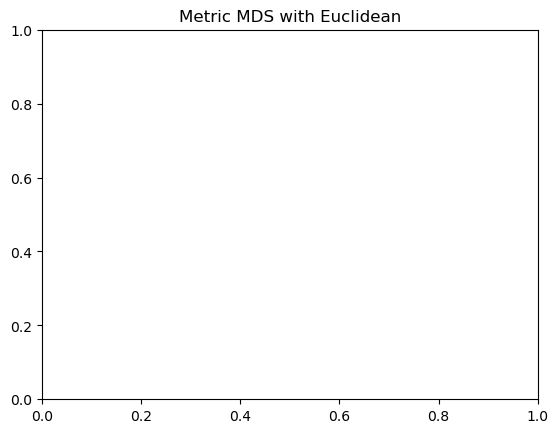

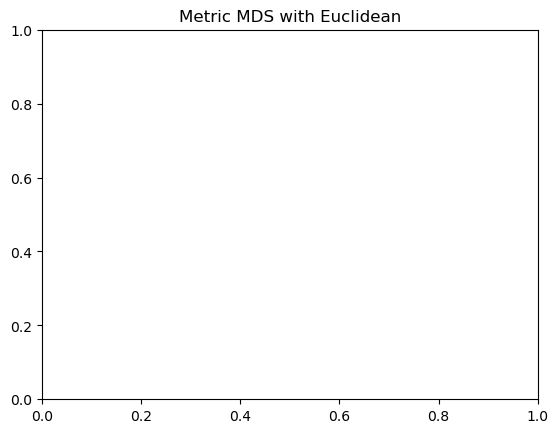

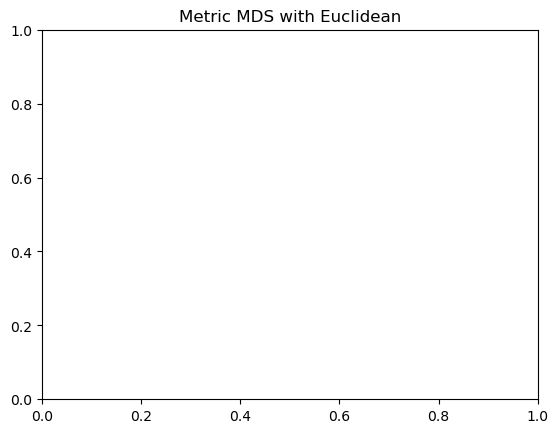

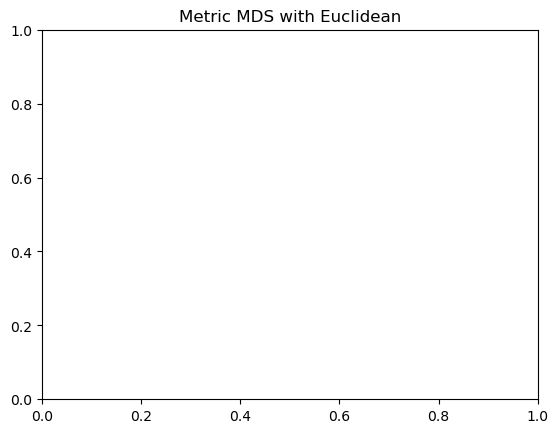

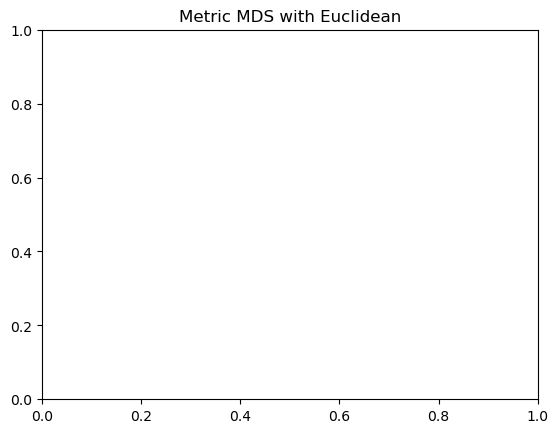

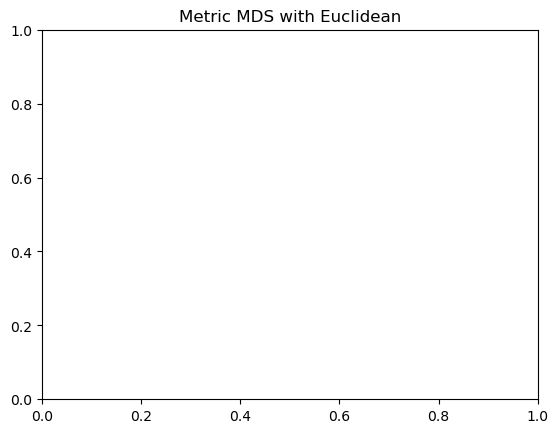

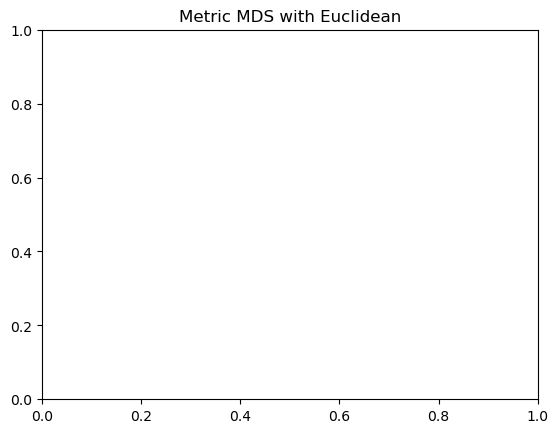

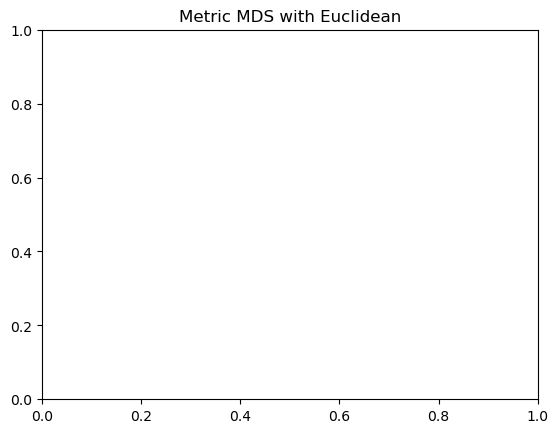

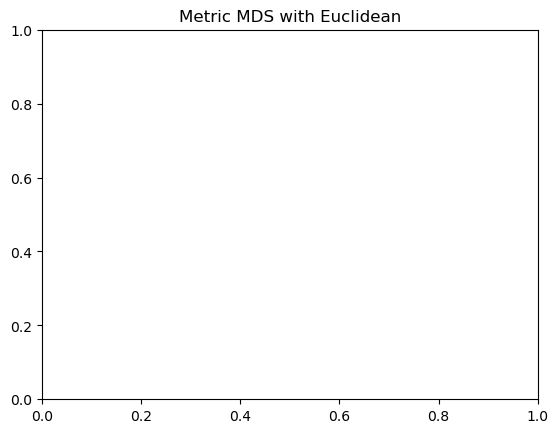

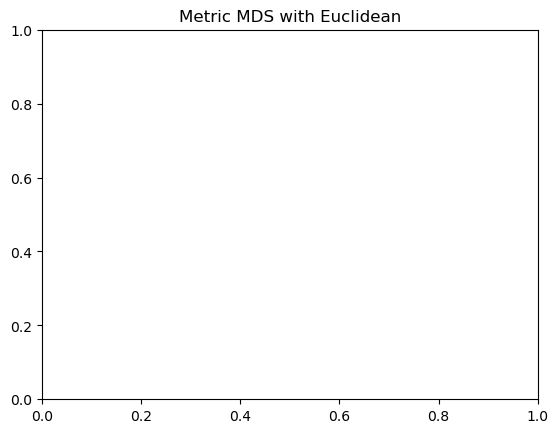

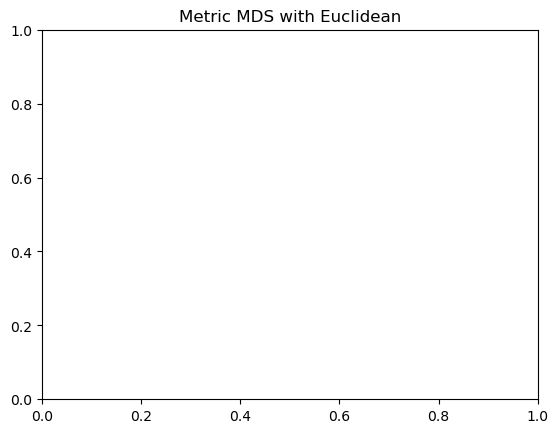

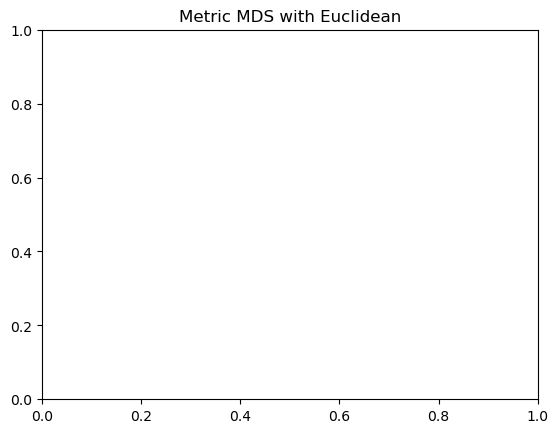

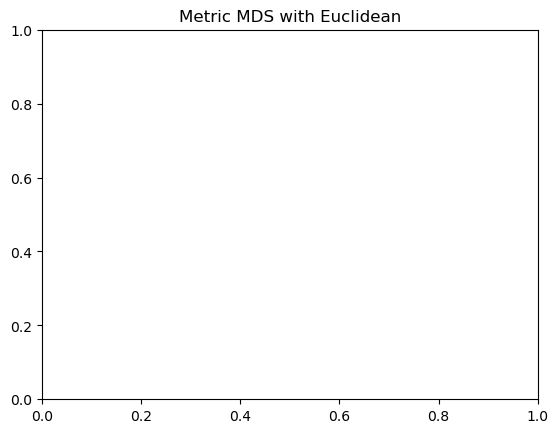

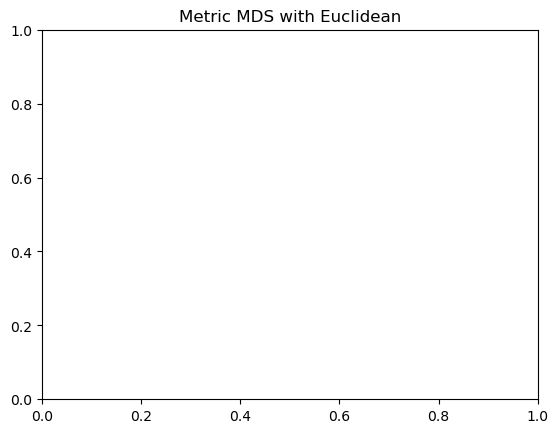

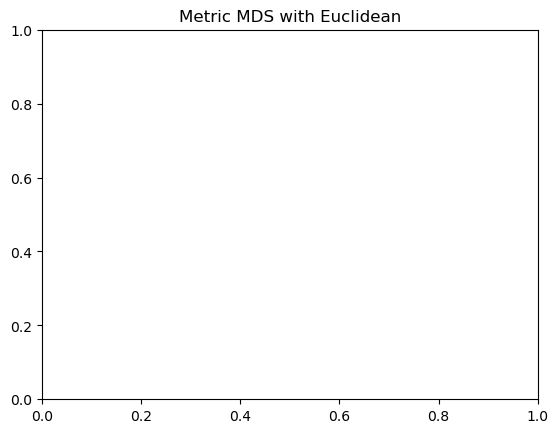

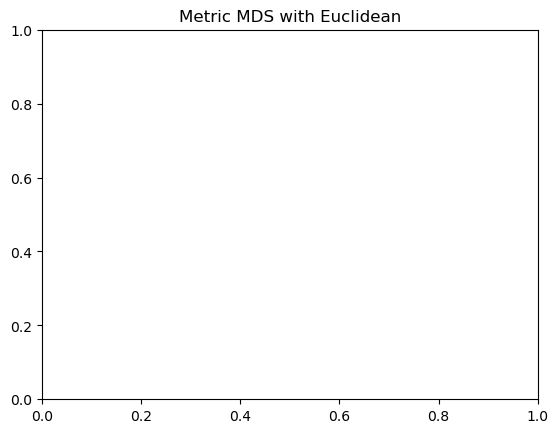

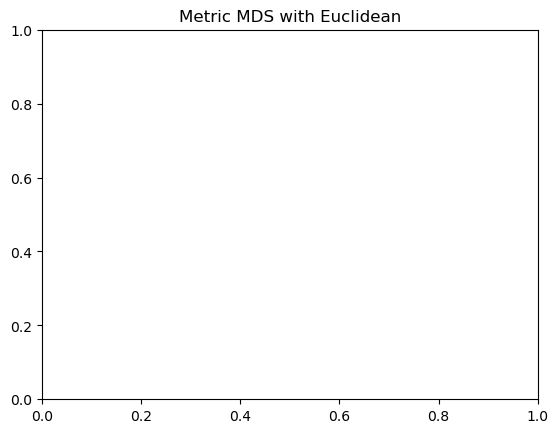

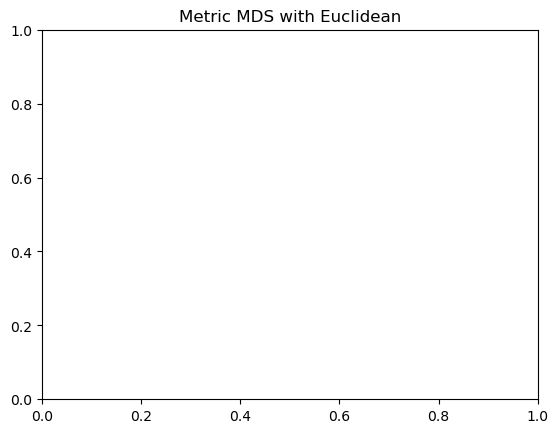

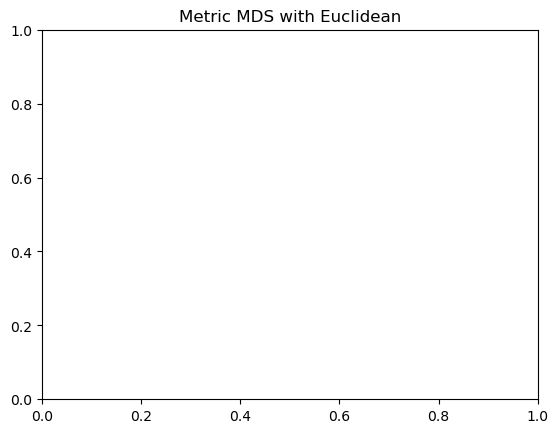

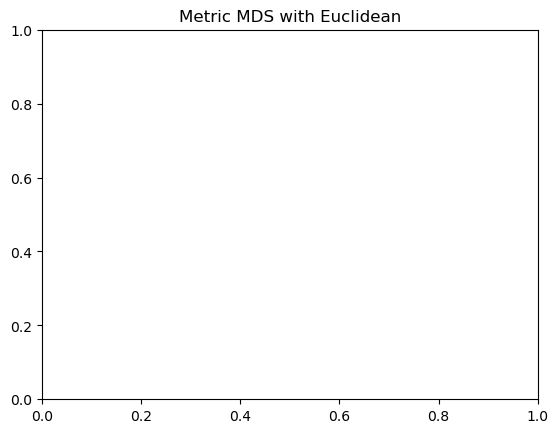

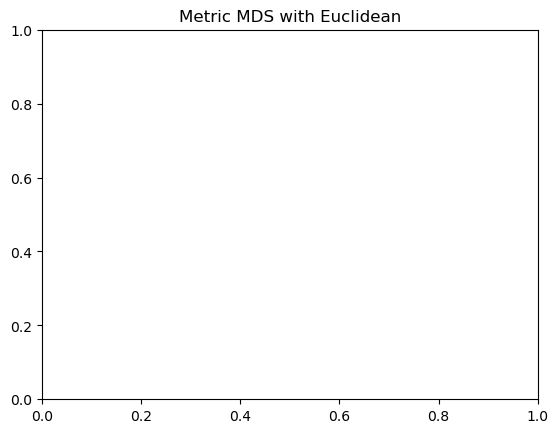

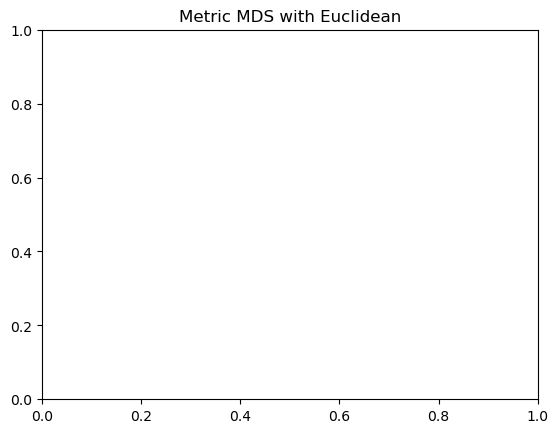

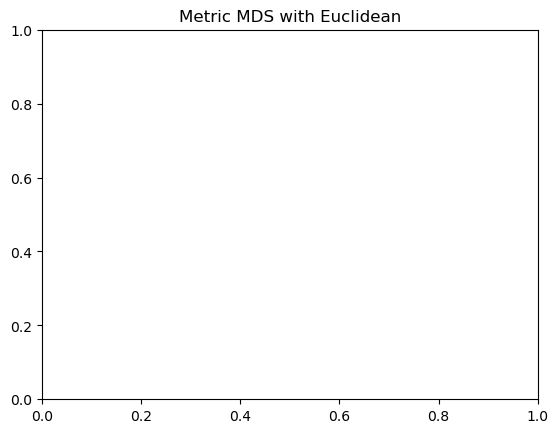

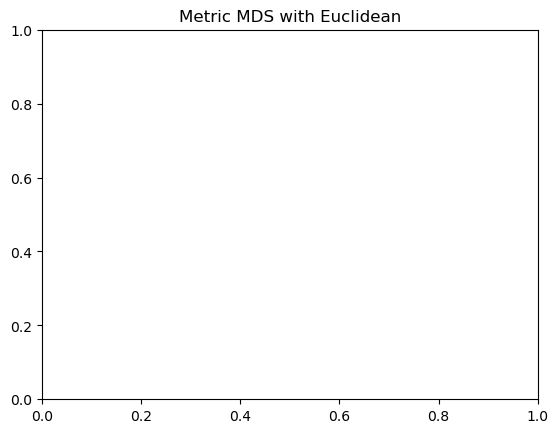

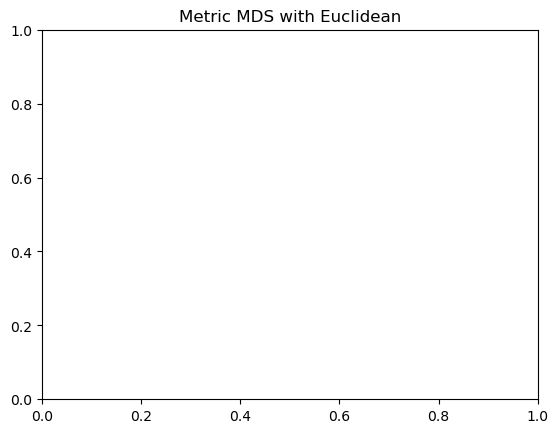

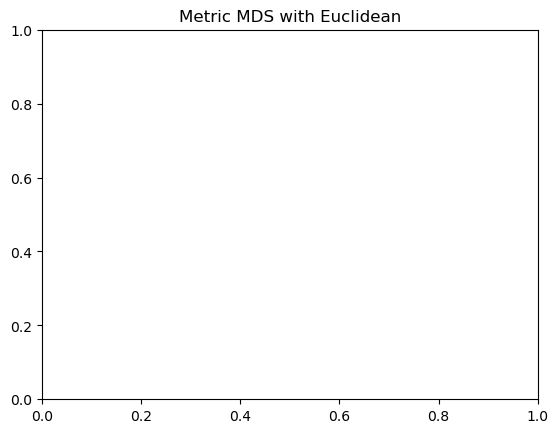

In [19]:
dist_euclid = euclidean_distances(X_faces)
mapData(dist_euclid, X_faces, y_faces, True,
 'Metric MDS with Euclidean')

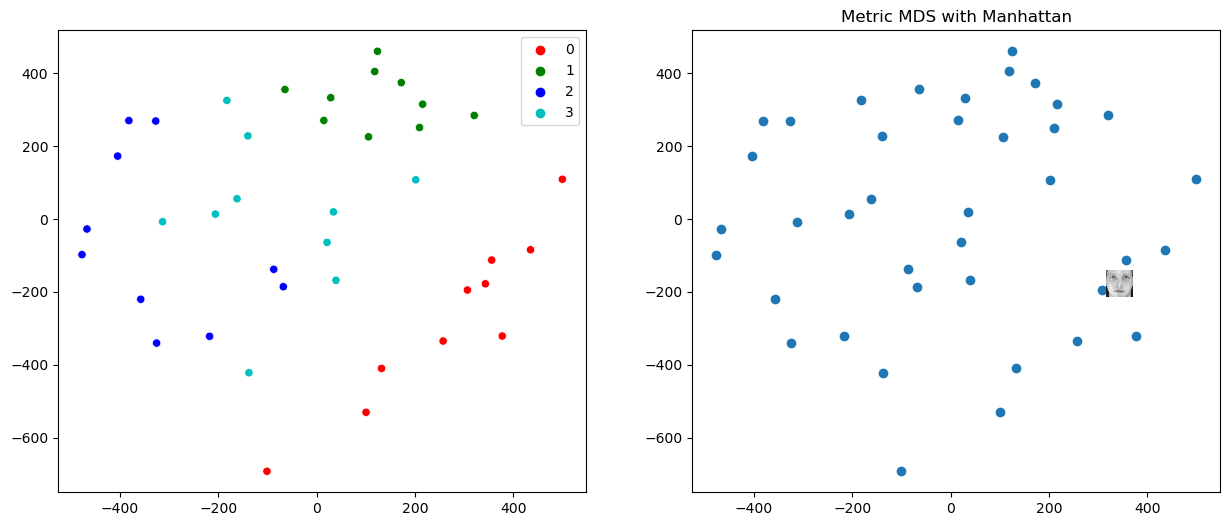

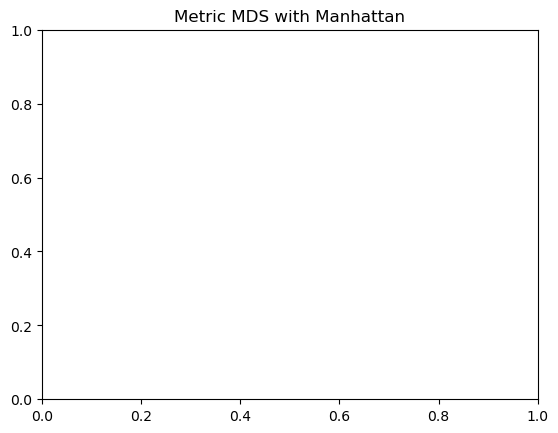

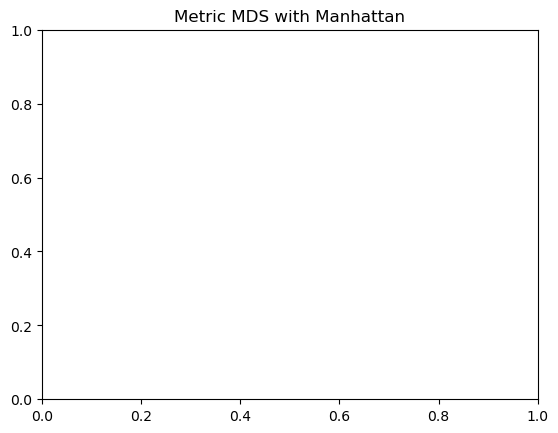

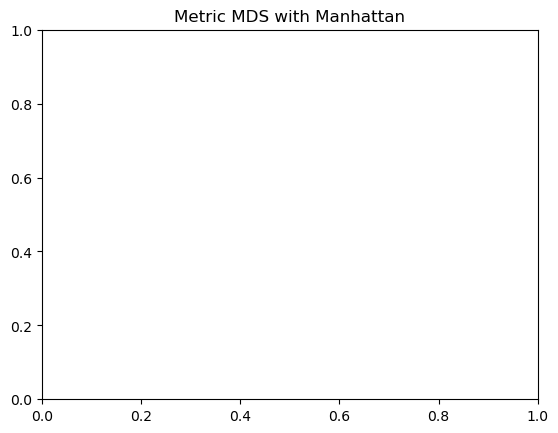

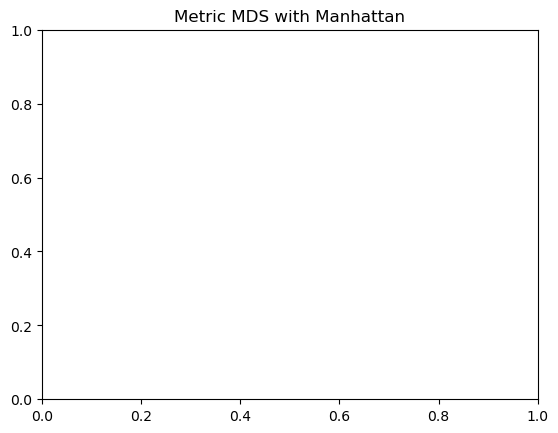

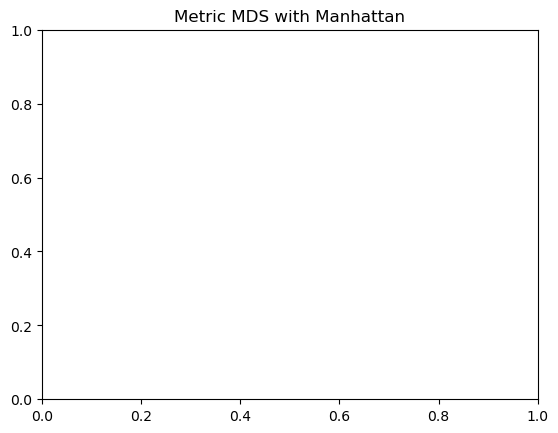

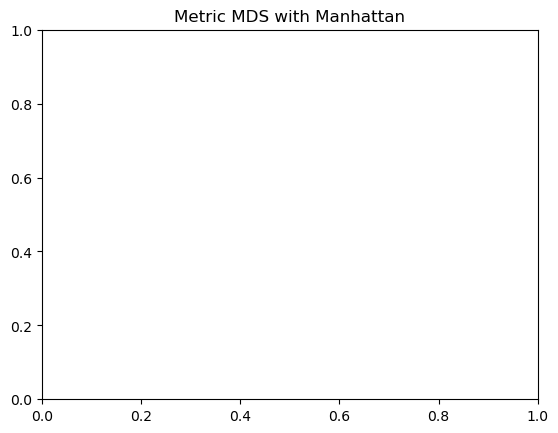

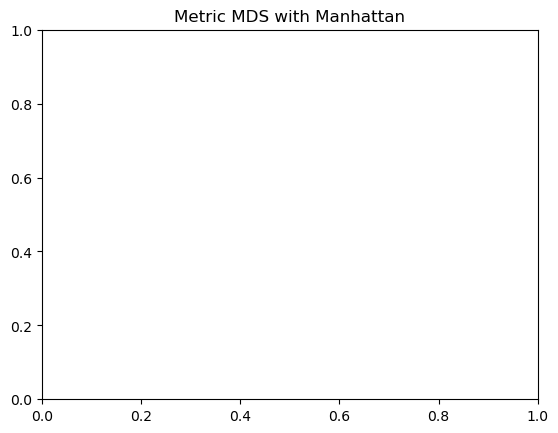

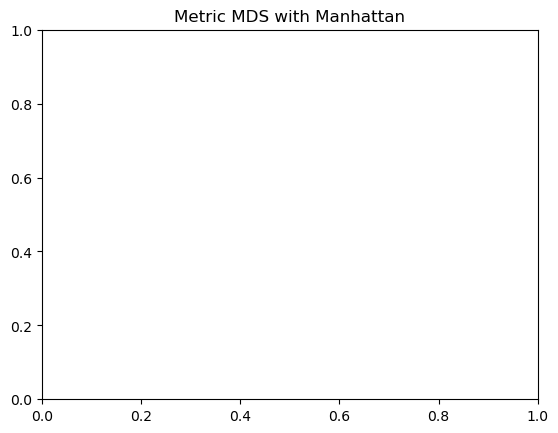

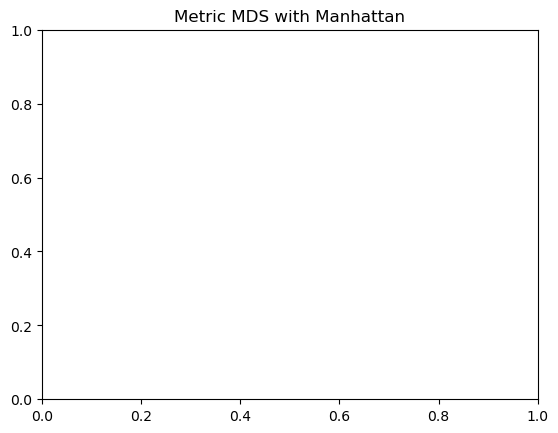

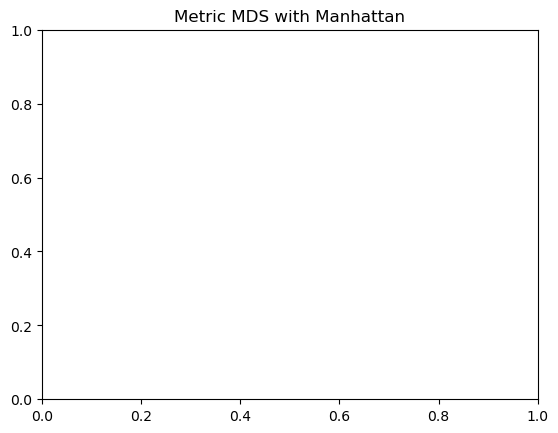

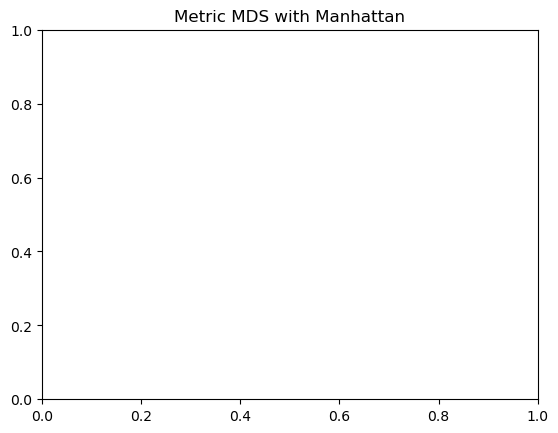

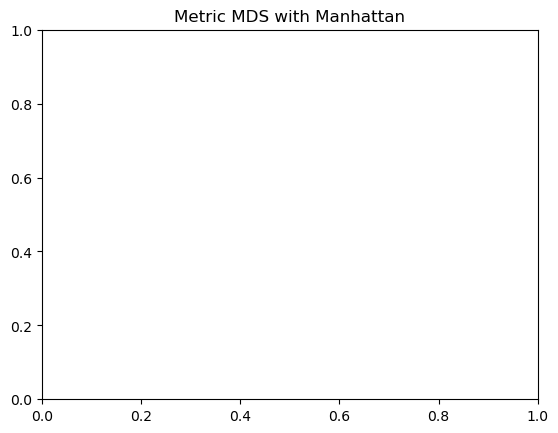

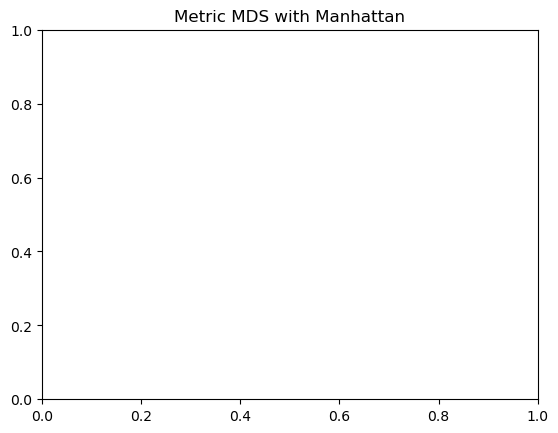

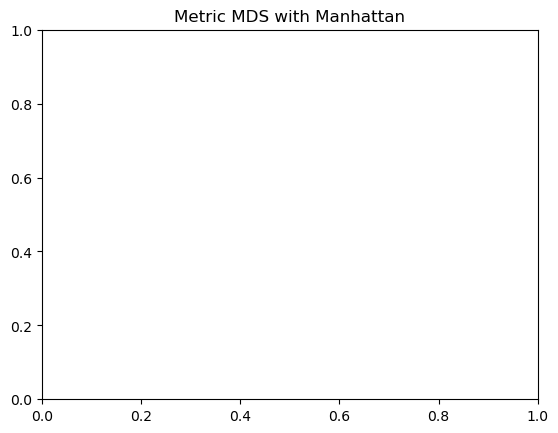

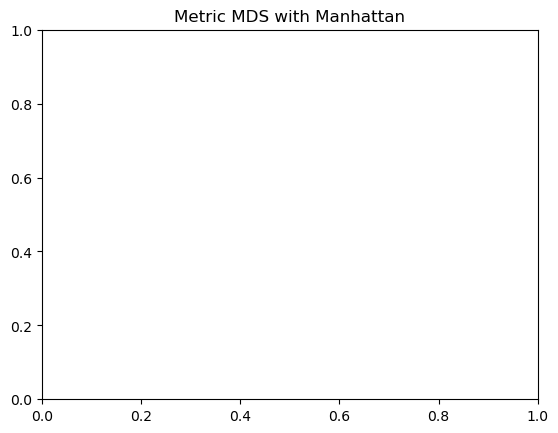

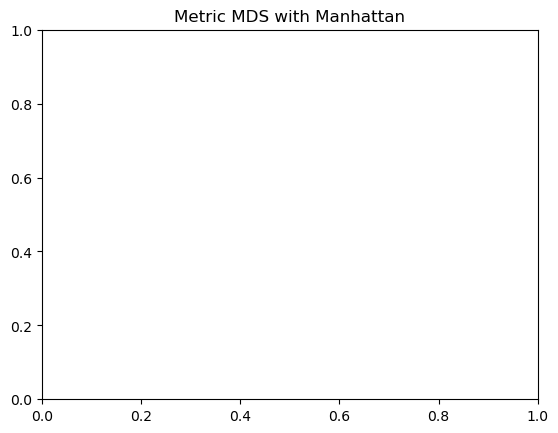

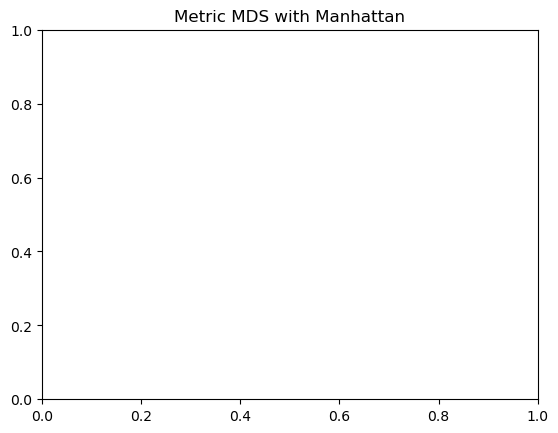

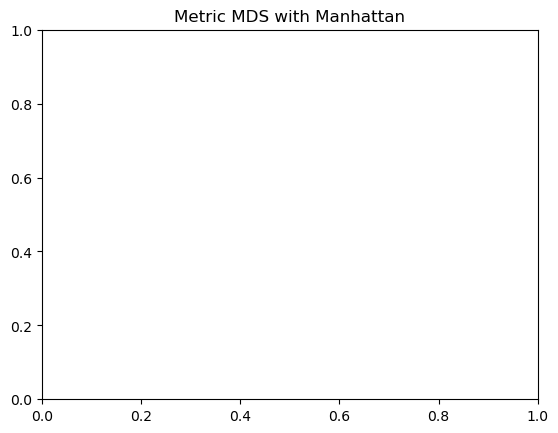

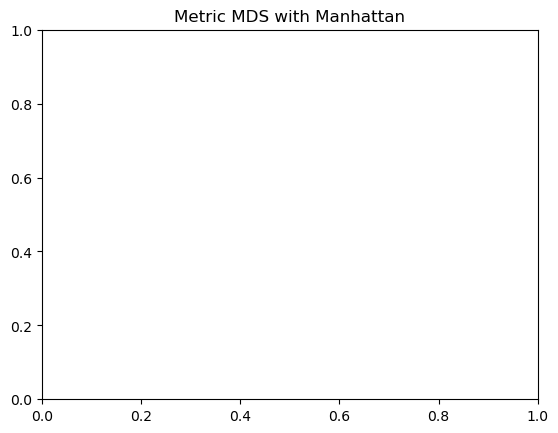

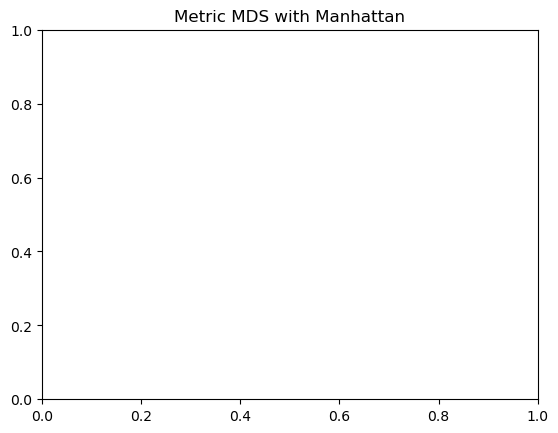

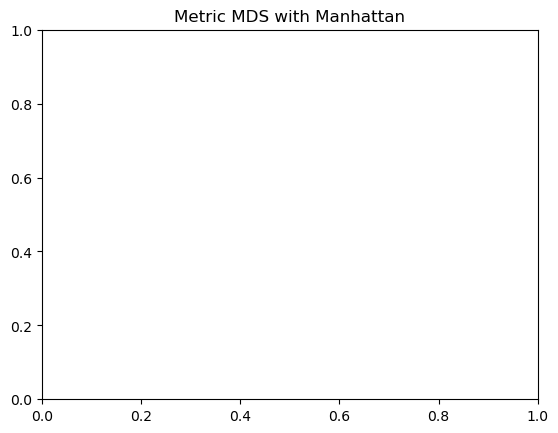

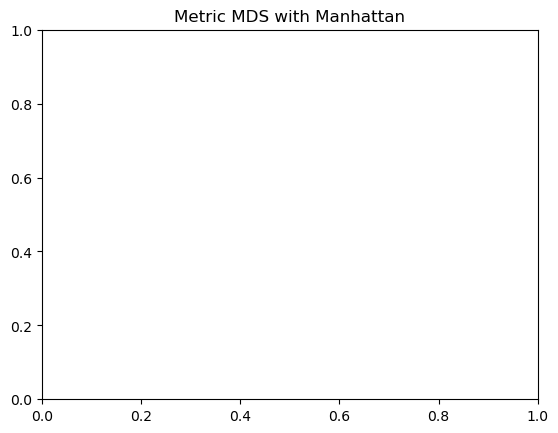

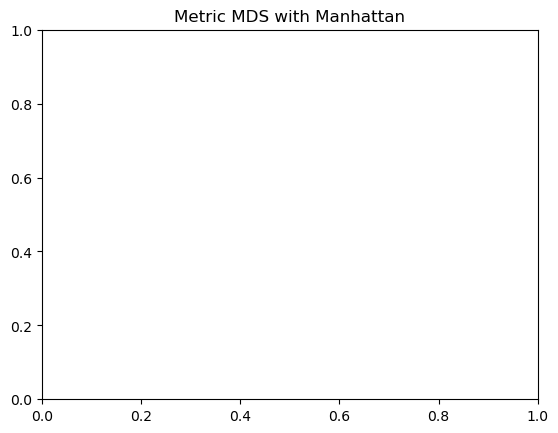

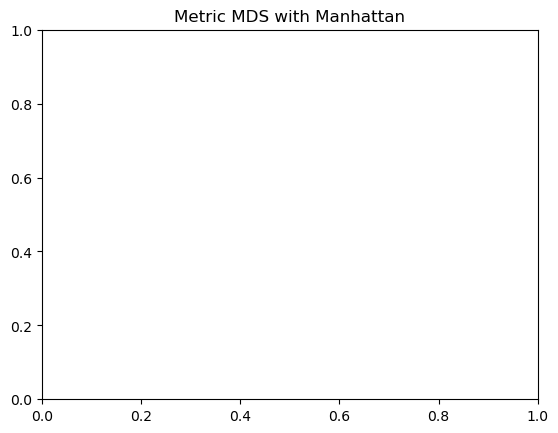

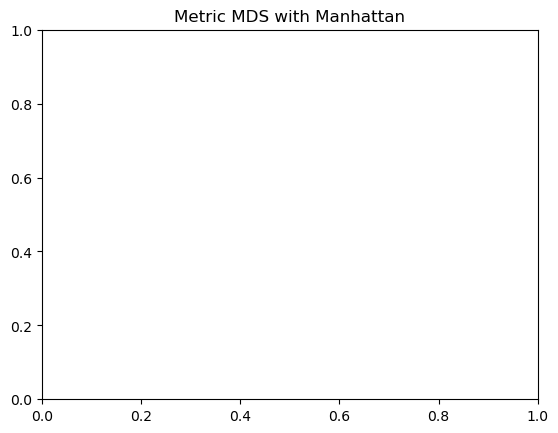

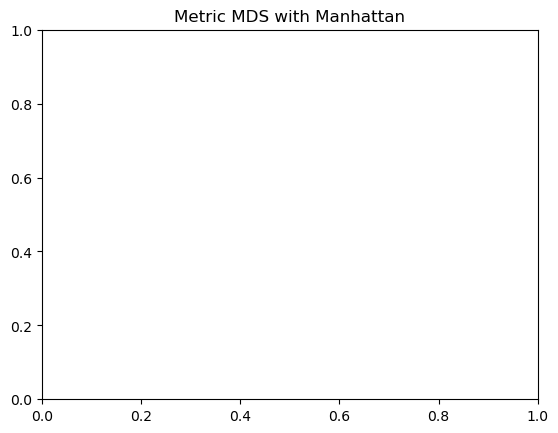

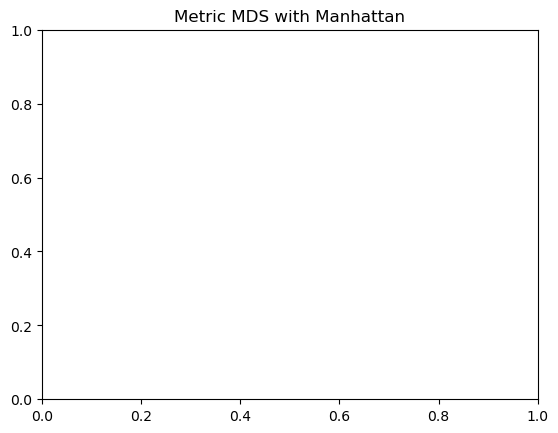

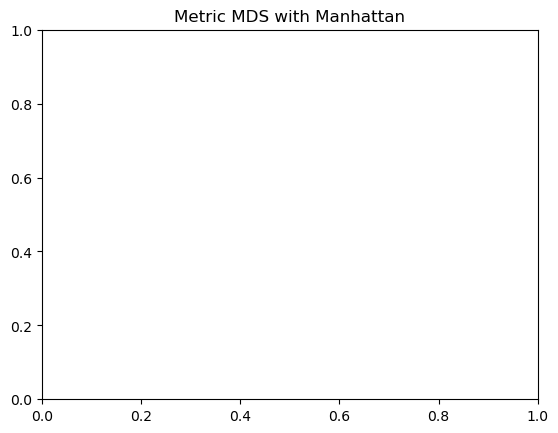

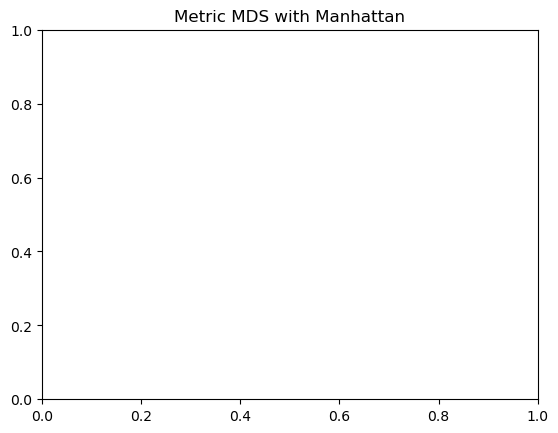

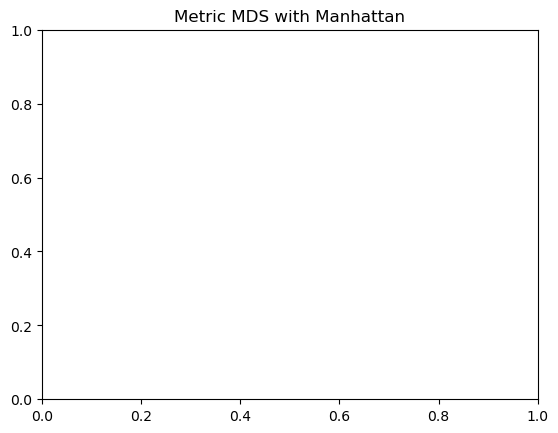

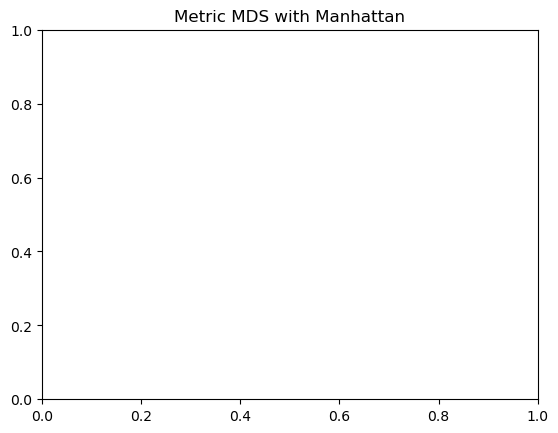

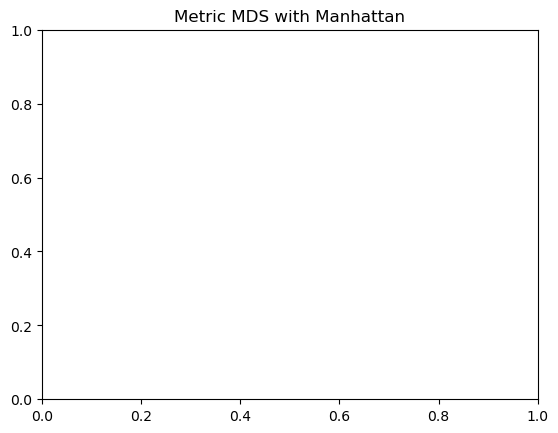

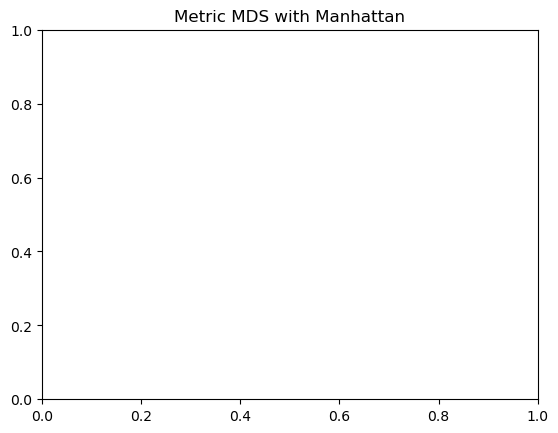

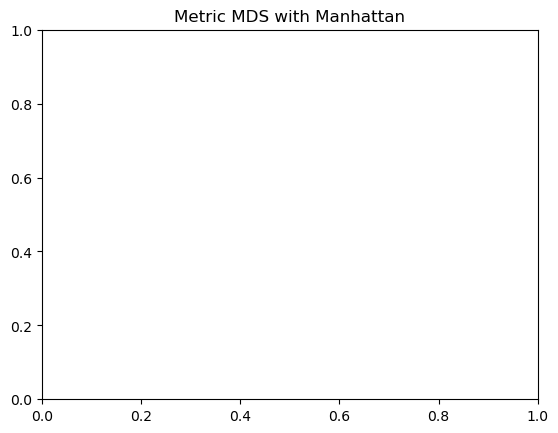

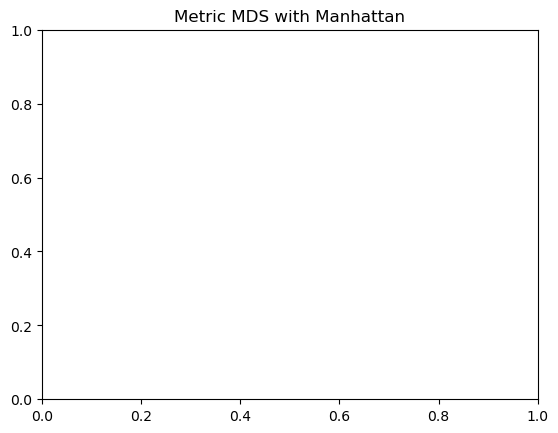

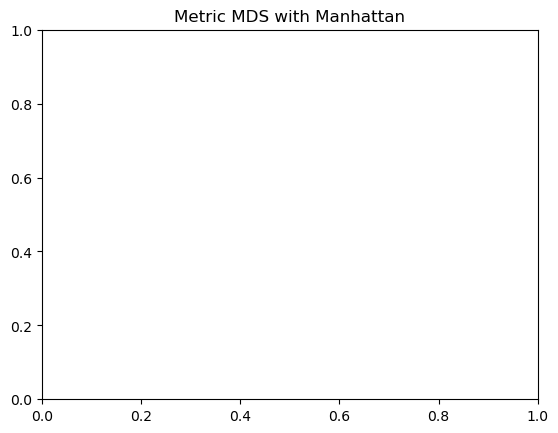

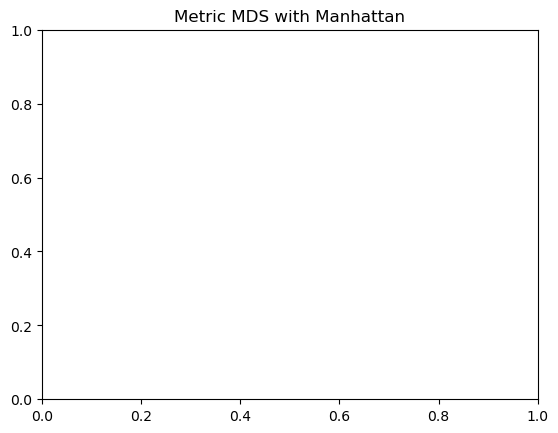

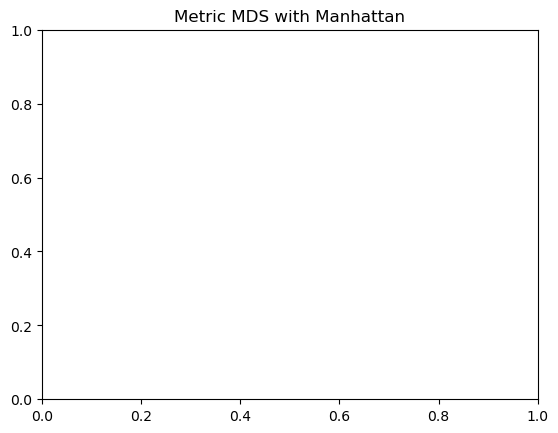

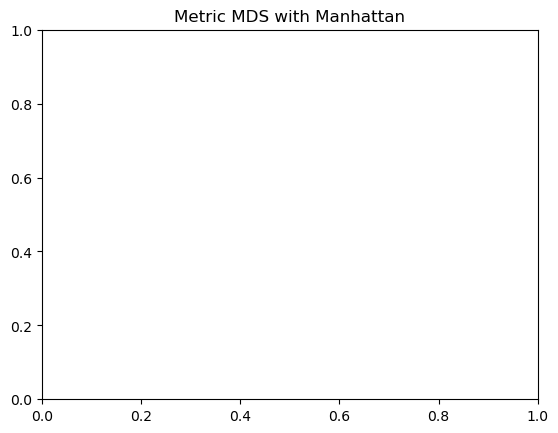

In [20]:
dist_L1 = manhattan_distances(X_faces)
mapData(dist_L1, X_faces, y_faces, True,
 'Metric MDS with Manhattan')


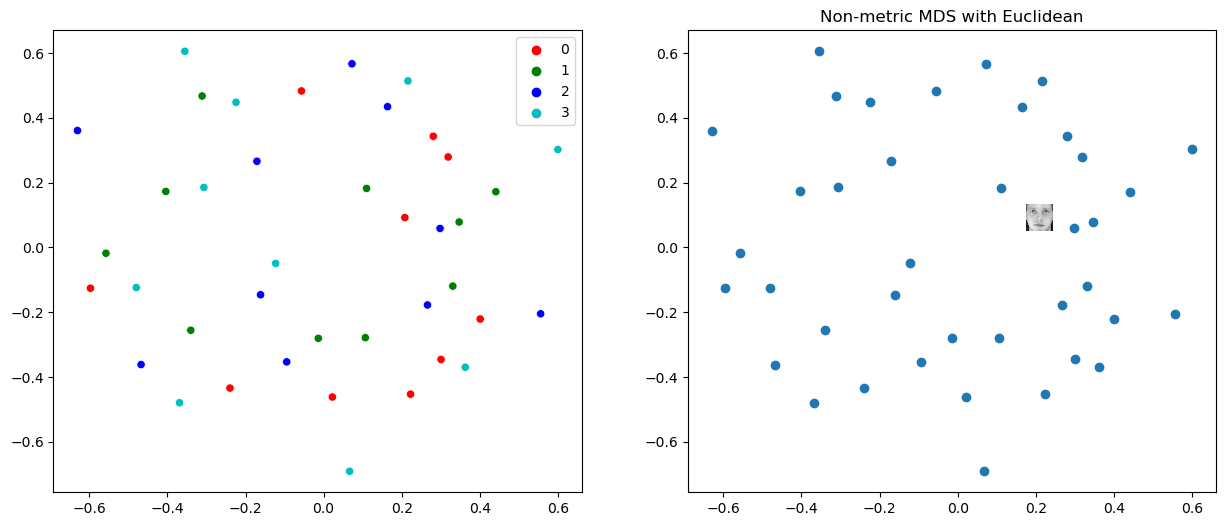

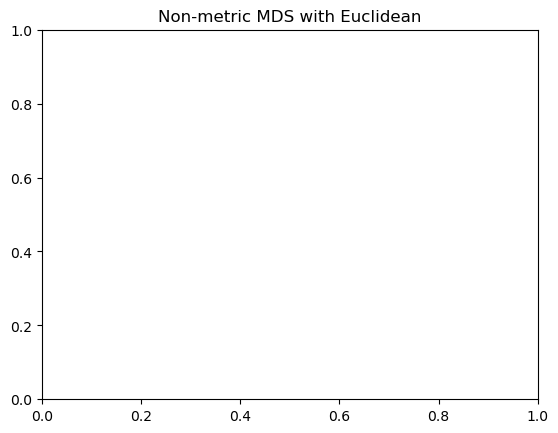

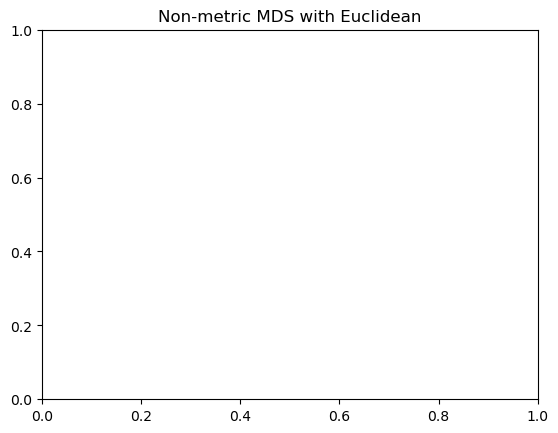

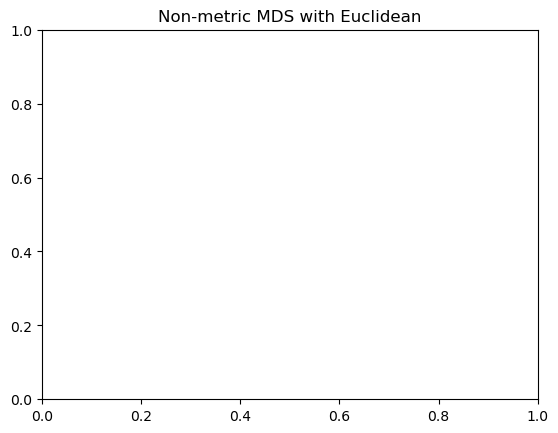

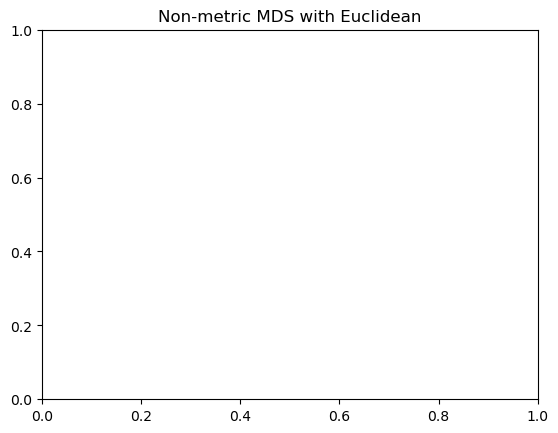

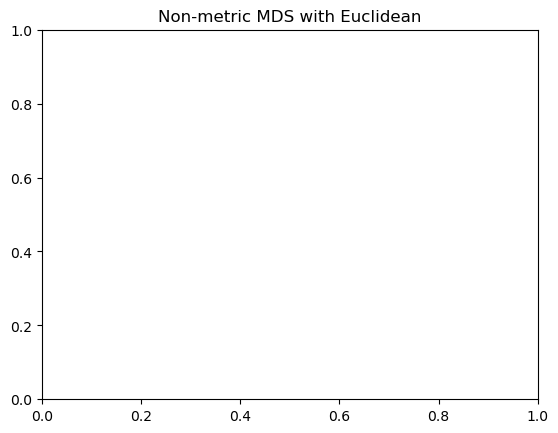

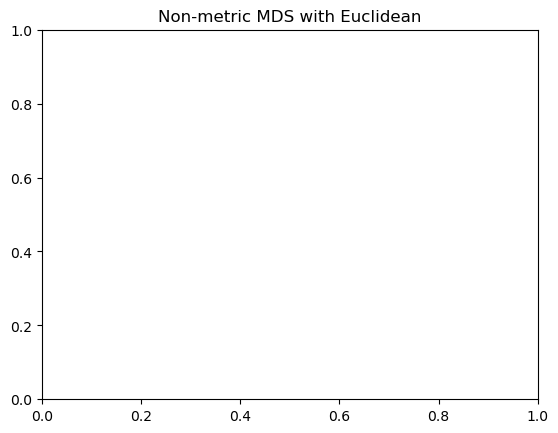

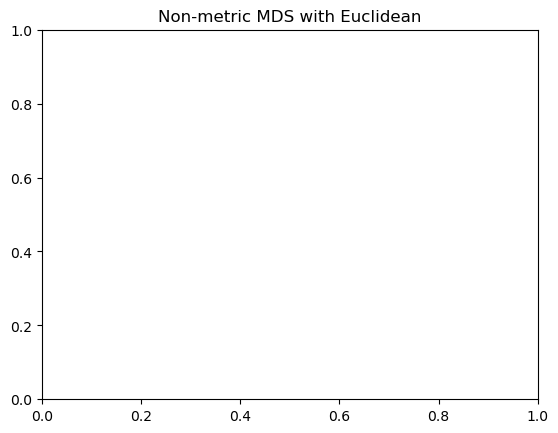

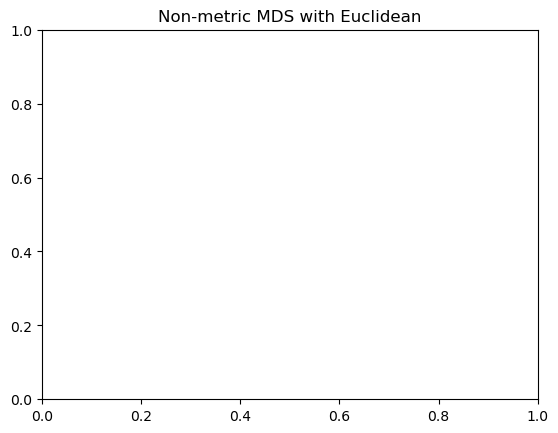

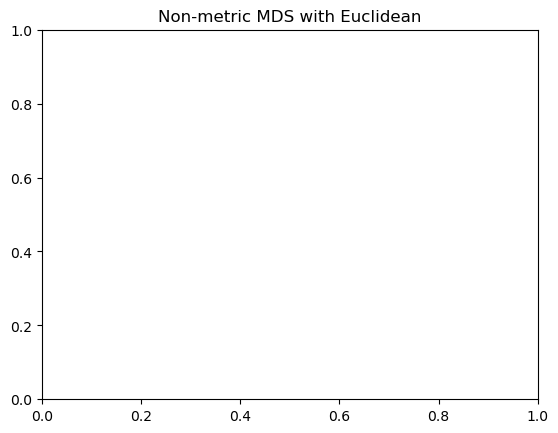

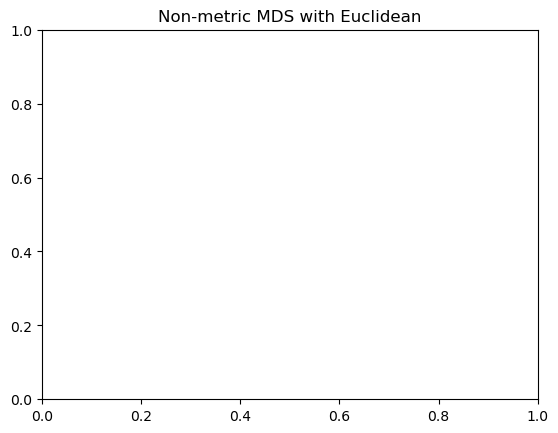

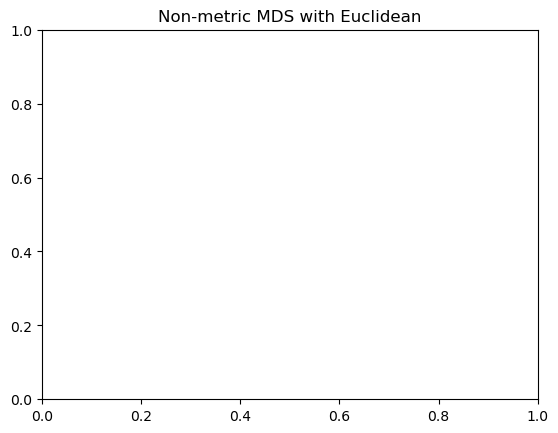

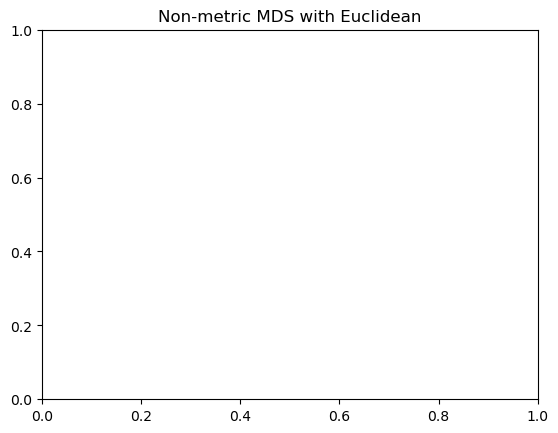

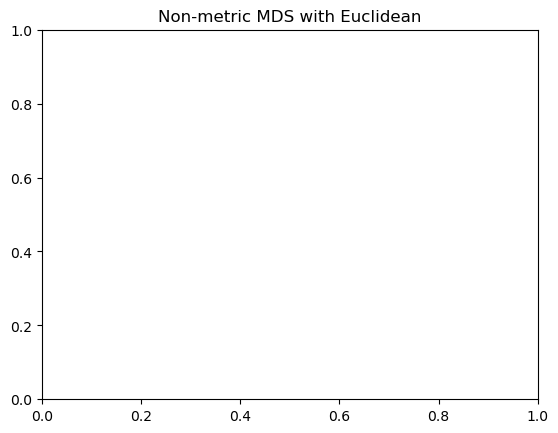

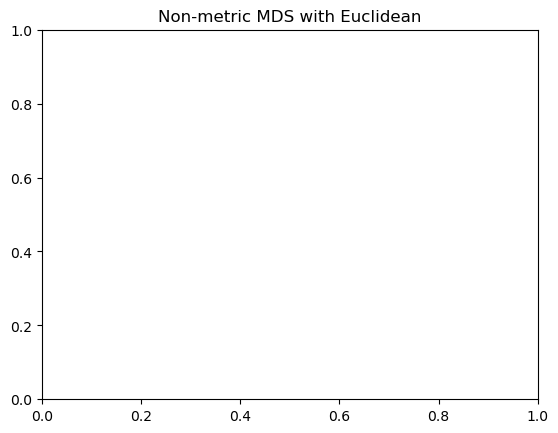

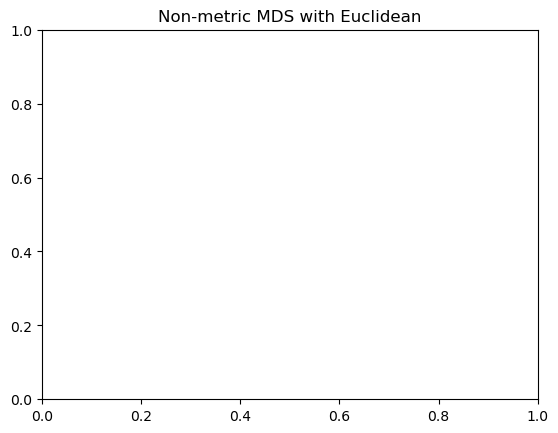

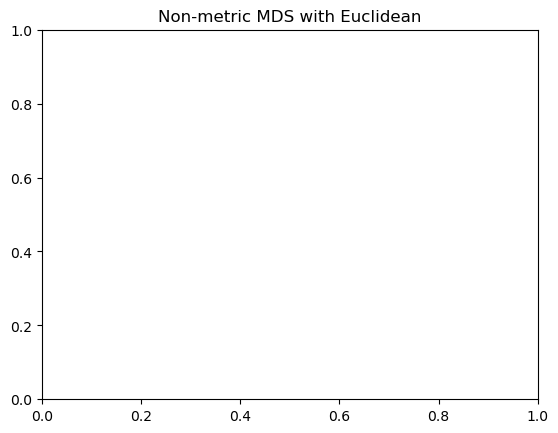

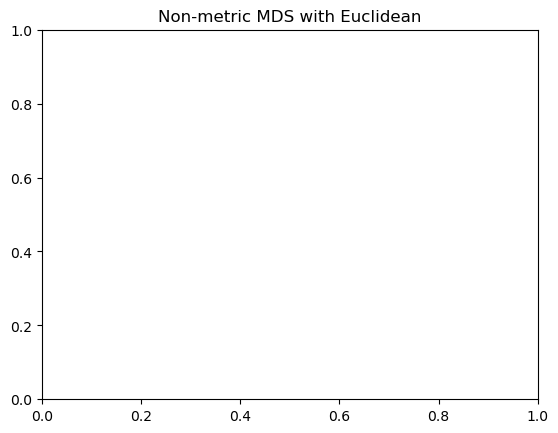

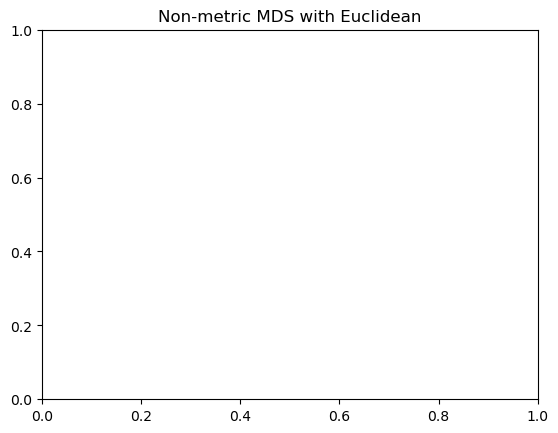

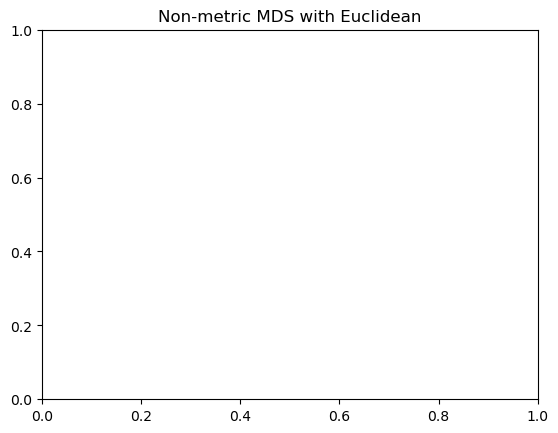

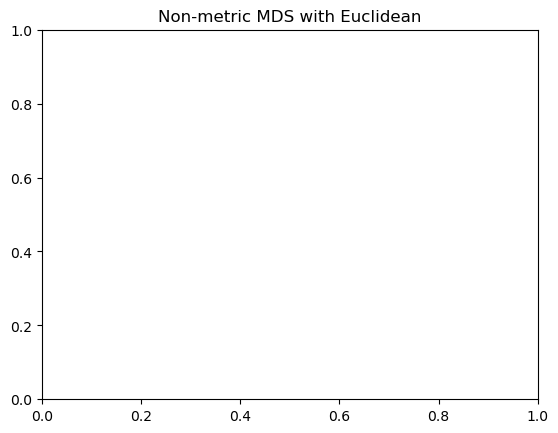

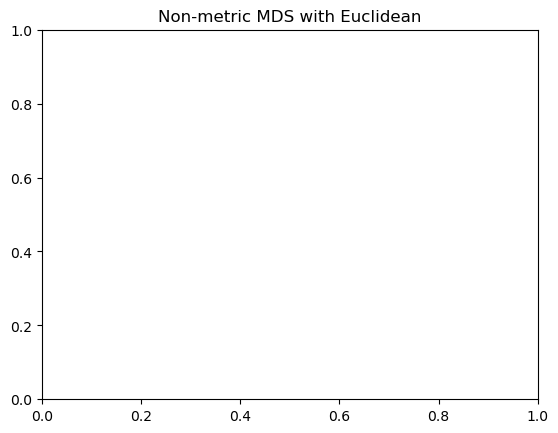

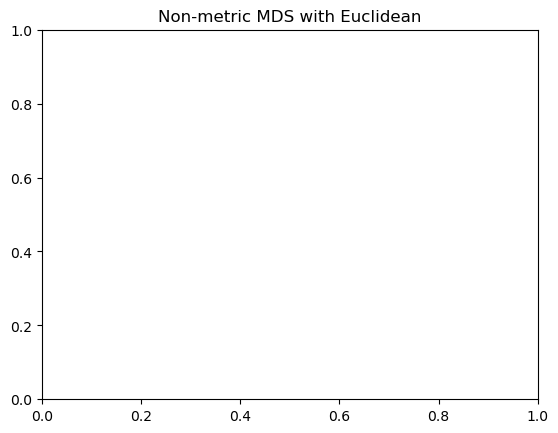

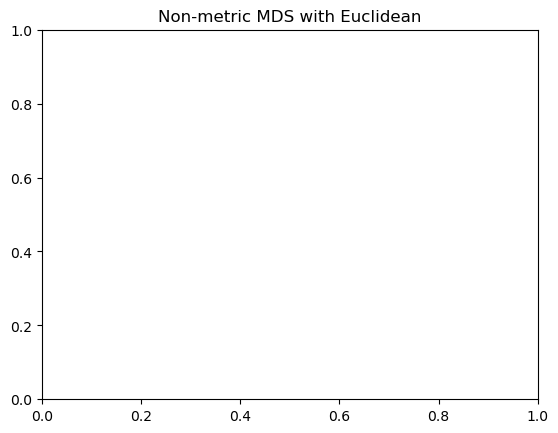

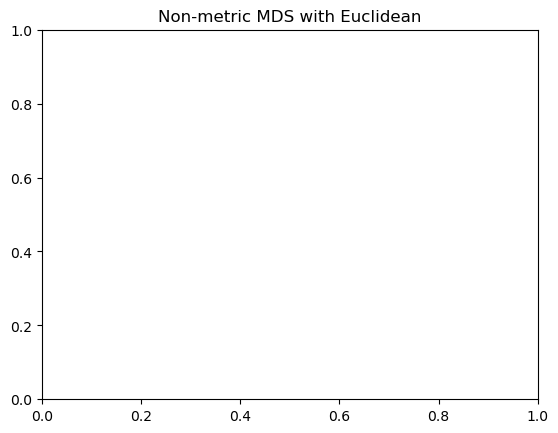

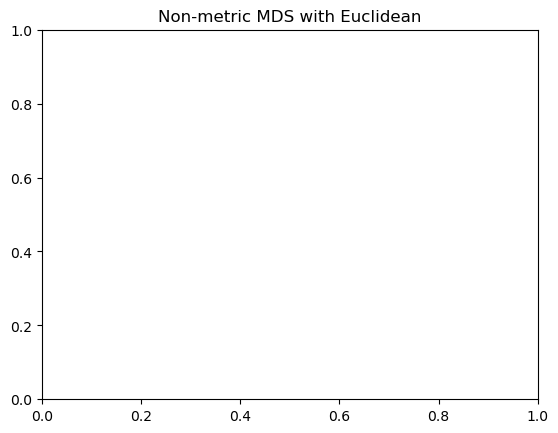

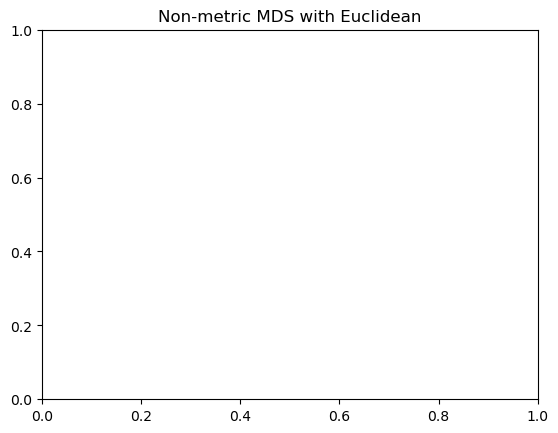

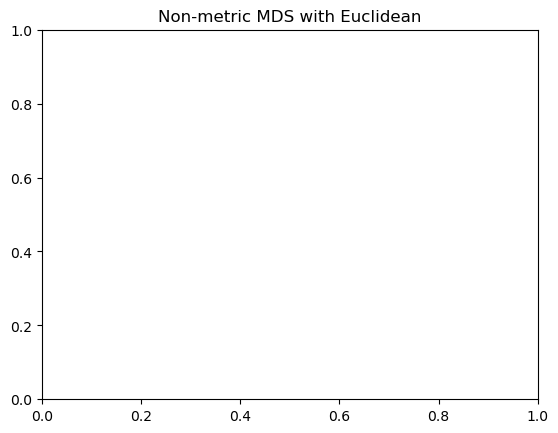

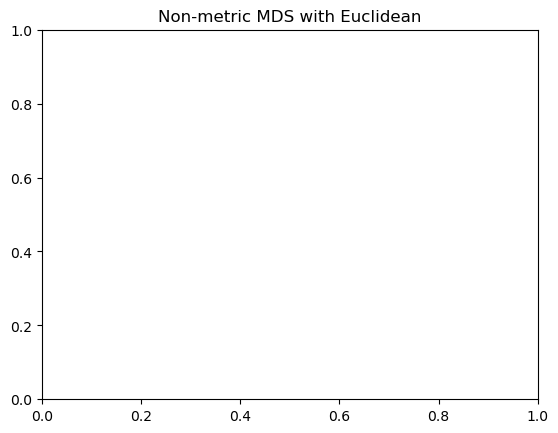

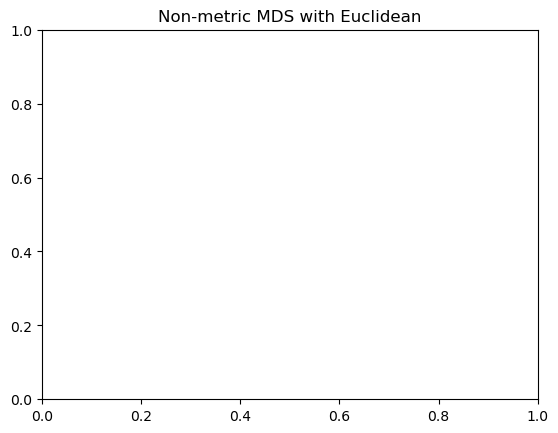

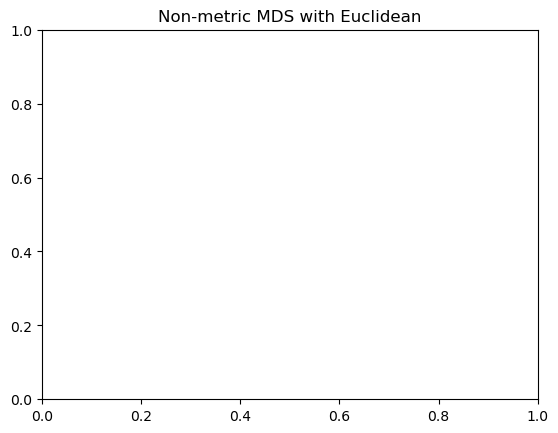

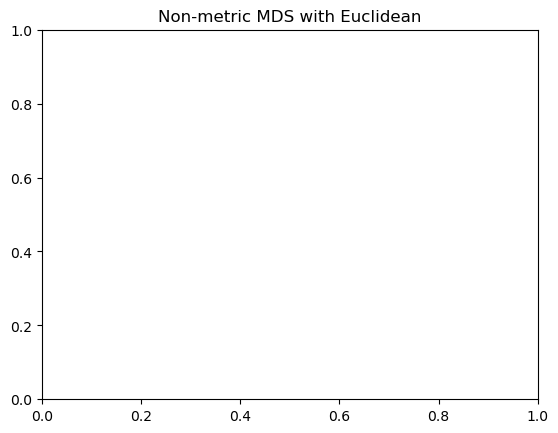

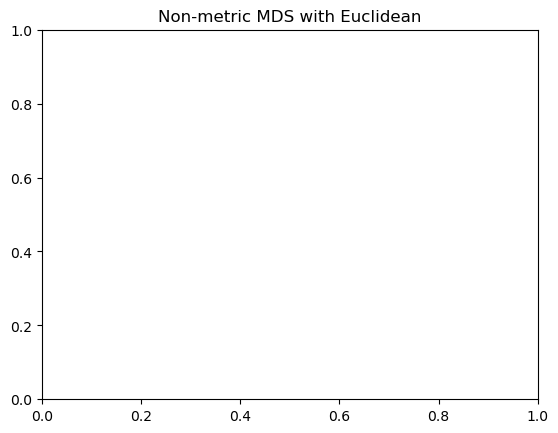

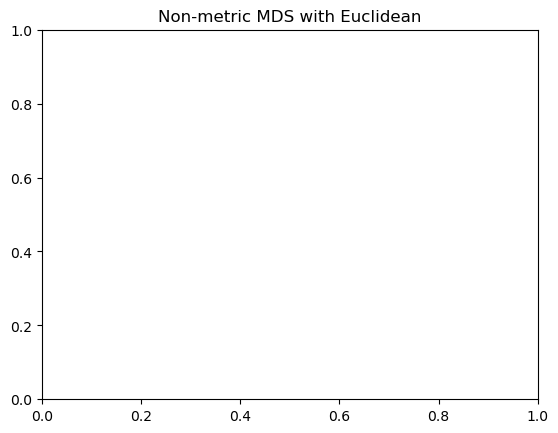

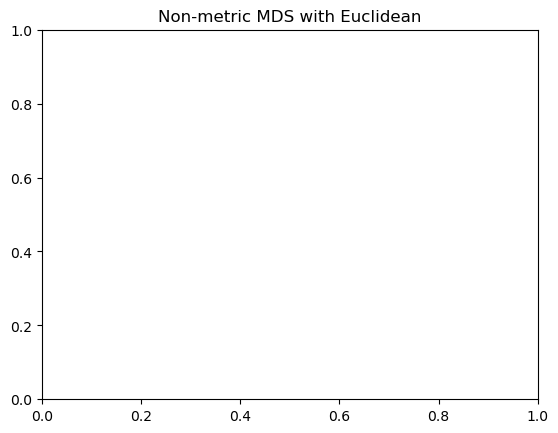

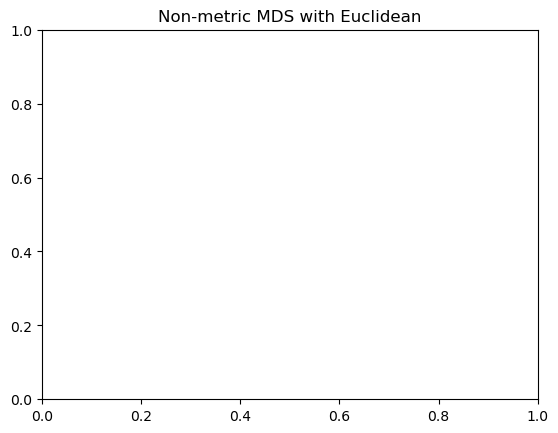

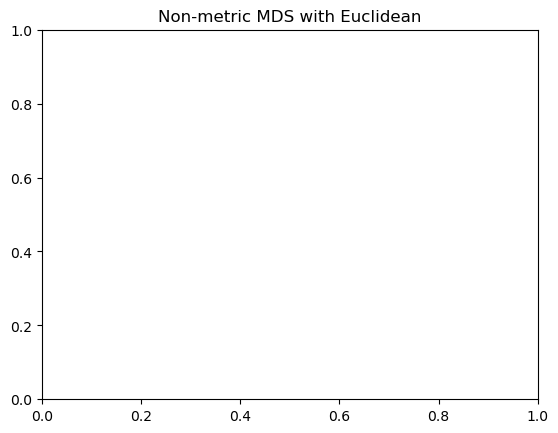

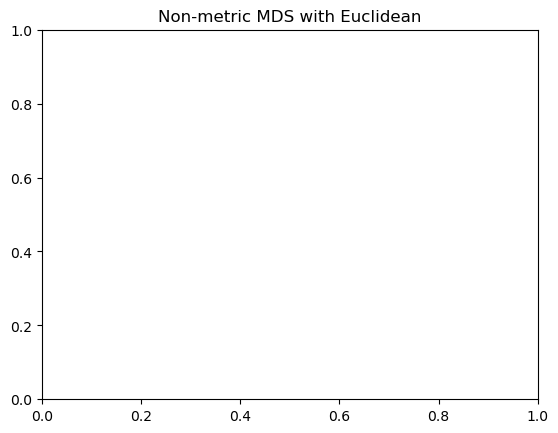

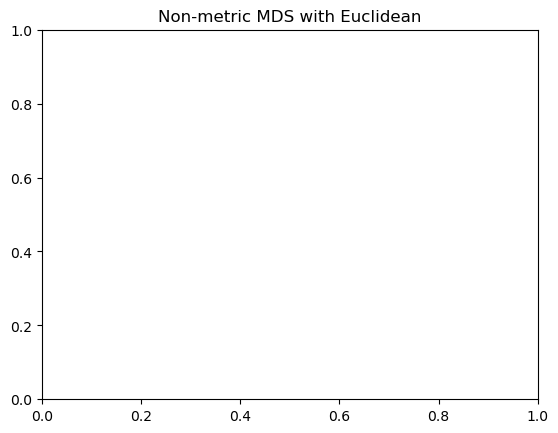

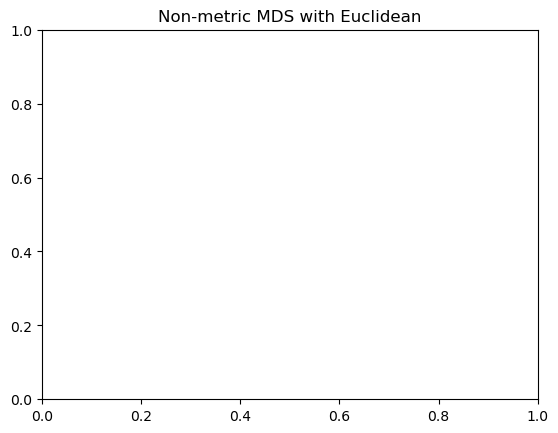

In [21]:
mapData(dist_euclid, X_faces, y_faces, False,
 'Non-metric MDS with Euclidean')

In [25]:
stress = []
# Max value for n_components
max_range = 21
for dim in range(1, max_range):
     # Set up the MDS object
         mds = MDS(n_components=dim, dissimilarity='precomputed', random_state
     # Apply MDS
        pts = mds.fit_transform(dist_euclid)
     # Retrieve the stress value
         stress.append(mds.stress_)
    # Plot stress vs. n_components

plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()


SyntaxError: positional argument follows keyword argument (172810209.py, line 8)